<a href="https://colab.research.google.com/github/min02choi/Data-Analysis-and-Applications/blob/master/week11/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. sklearn (사이킷런)을 이용하여 로지스틱 회귀 학습하기**

In [1]:
import pandas as pd
data_url= "http://www-stat.wharton.upenn.edu/~waterman/DataSets/uva.txt"

df = pd.read_table(data_url)
df.head()

,who,Newbie,Age,Gender,Household Income,Sexual Preference,Country,Education Attainment,Major Occupation,Marital Status,Years on Internet
0,id74364,0,54.0,Male,$50-74,Gay male,Ontario,Some College,Computer,Other,4-6 yr
1,id84505,0,39.0,Female,Over $100,Heterosexual,Sweden,Professional,Other,Other,1-3 yr
2,id84509,1,49.0,Female,$40-49,Heterosexual,Washington,Some College,Management,Other,Under 6 mo
3,id87028,1,22.0,Female,$40-49,Heterosexual,Florida,Some College,Computer,Married,6-12 mo
4,id76087,0,20.0,Male,$30-39,Bisexual,New Jersey,Some College,Education,Single,1-3 yr


- 학습에 사용되지 않을 필요없는 데이터 (열)을 삭제합니다.

In [2]:
df.drop(labels=['who', 'Country', 'Years on Internet'], axis=1, inplace=True)

df.dtypes

Newbie                    int64
Age                     float64
Gender                   object
Household Income         object
Sexual Preference        object
Education Attainment     object
Major Occupation         object
Marital Status           object
dtype: object

In [3]:
df_onehot = pd.get_dummies(df)
df_onehot.shape

(19583, 38)

In [4]:
df_onehot

,Newbie,Age,Gender_Female,Gender_Male,Household Income_$10-19,Household Income_$20-29,Household Income_$30-39,Household Income_$40-49,Household Income_$50-74,Household Income_$75-99,...,Major Occupation_Education,Major Occupation_Management,Major Occupation_Other,Major Occupation_Professional,Marital Status_Divorced,Marital Status_Married,Marital Status_Other,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
0,0,54.0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,39.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,49.0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,22.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,20.0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19578,0,22.0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
19579,0,19.0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
19580,0,49.0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
19581,1,42.0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


- 결측값 확인하기

In [5]:
df_onehot.isnull().sum()

Newbie                                 0
Age                                  561
Gender_Female                          0
Gender_Male                            0
Household Income_$10-19                0
Household Income_$20-29                0
Household Income_$30-39                0
Household Income_$40-49                0
Household Income_$50-74                0
Household Income_$75-99                0
Household Income_Over $100             0
Household Income_Under $10             0
Sexual Preference_Bisexual             0
Sexual Preference_Gay male             0
Sexual Preference_Heterosexual         0
Sexual Preference_Lesbian              0
Sexual Preference_Transgender          0
Sexual Preference_na                   0
Education Attainment_College           0
Education Attainment_Doctoral          0
Education Attainment_Grammar           0
Education Attainment_High School       0
Education Attainment_Masters           0
Education Attainment_Other             0
Education Attain

- 열 "Age" 에서 결측값이 있는 경우에 평균 값으로 바꿔줍니다.

In [6]:
df_onehot.loc[pd.isnull(df_onehot['Age']), "Age"] = df_onehot['Age'].mean()
df_onehot.isnull().sum()

Newbie                               0
Age                                  0
Gender_Female                        0
Gender_Male                          0
Household Income_$10-19              0
Household Income_$20-29              0
Household Income_$30-39              0
Household Income_$40-49              0
Household Income_$50-74              0
Household Income_$75-99              0
Household Income_Over $100           0
Household Income_Under $10           0
Sexual Preference_Bisexual           0
Sexual Preference_Gay male           0
Sexual Preference_Heterosexual       0
Sexual Preference_Lesbian            0
Sexual Preference_Transgender        0
Sexual Preference_na                 0
Education Attainment_College         0
Education Attainment_Doctoral        0
Education Attainment_Grammar         0
Education Attainment_High School     0
Education Attainment_Masters         0
Education Attainment_Other           0
Education Attainment_Professional    0
Education Attainment_Some

In [7]:
x_data = df_onehot.iloc[:, 1:].values
y_data = df_onehot.iloc[:, 0].values
y_data.shape, x_data.shape

((19583,), (19583, 37))

In [8]:
x_data

array([[54.,  0.,  1., ...,  0.,  0.,  0.],
       [39.,  1.,  0., ...,  0.,  0.,  0.],
       [49.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [49.,  1.,  0., ...,  0.,  0.,  0.],
       [42.,  1.,  0., ...,  0.,  0.,  0.],
       [24.,  1.,  0., ...,  0.,  1.,  0.]])

- x_data에 min-max scaling을 수행

In [9]:
from sklearn import preprocessing # Min-Max Standardzation

min_max_scaler = preprocessing.MinMaxScaler()
x_data = min_max_scaler.fit_transform(x_data)

x_data

array([[0.65333333, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.45333333, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.58666667, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.58666667, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.49333333, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25333333, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

- Train/Test Set Split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13120, 37), (6463, 37), (13120,), (6463,))

- Linear Regressor와 유사하게, Logistic Regressor를 학습시키기 위해서 "LogisticRegression" 클래스를 사용합니다.

In [11]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=True)
logreg.fit(X_train, y_train.flatten())

LogisticRegression()

- LogisticRegression 클래스는 많은 옵션을 설정할 수 있습니다.
- Gradient Descent 방법을 사용하는 다른 Regressor (SGD)와 유사한 인자를 사용합니다.

- **max_inter** : 최대 한복 횟수
- **tol** : 더 이상 비용이 줄어들지 않을때 반복이 멈추는 값
- **C** : 학습률 역수 (1/alpha)


In [12]:
LogisticRegression(C=1.0, fit_intercept=True, penalty='l2', max_iter=100, tol=0.0001)

LogisticRegression()

In [13]:
logreg.predict(X_test)

array([0, 0, 1, ..., 1, 0, 0])

- classification (분류) 결과가 아닌 Logistic Regression의 probability를 확인합니다.
- 여기서 Binary Class이므로 2개의 Class (열)이 존재하며, 모든 클래스에 대한 확률의 합 (각 행 값의 합)은 1입니다.

In [14]:
logreg.predict_proba(X_test)

array([[0.57503065, 0.42496935],
       [0.68357857, 0.31642143],
       [0.48874195, 0.51125805],
       ...,
       [0.29103005, 0.70896995],
       [0.75341578, 0.24658422],
       [0.65220402, 0.34779598]])

- 앞에서 배운 Classification 성능 평가 지표로 모델 학습의 성능을 평가할 수 있습니다.

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_true = y_test.copy()
y_pred = logreg.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[4584,  270],
       [1254,  355]])

In [16]:
accuracy_score(y_true, y_pred)

0.7641961937180876

**2. 소프트맥스로 멀티클래스 (Multi-class) 로지스틱 회귀 학습하기**
- 손글씨를 숫자로 인식하는 이미지 분류 문제

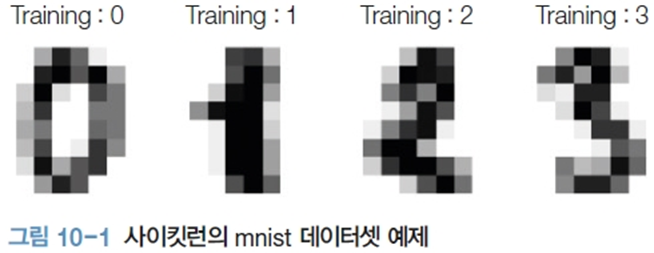

- 컴퓨터는 이미지를 각 픽셀 색상 값을 숫자로 인식
- 이미지를 일종의 점 (dot)으로 생각하면 m x n만큼의 공간이 존재하고, 그 공간 안에서 색깔이 진할수록 높은 값, 색깔이 옅을수록 낮은 값을 가짐


In [17]:
from sklearn import datasets
digit_dataset = datasets.load_digits()
digit_dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

- datasets 모듈의 load_digits함수로 dataset을 python dictionary 형태로 받을 수 있습니다.
- data에는 입력 (독립변수)이 저장되어 있으며, target이 클래스 / 레이블 (종속변수)를 가지고 있습니다.
- data와 image의 차이는 입력으로 쓰기 좋도록 1차원으로 만들었는가? 이미지 크기로 제공하는가에 달려있습니다.

In [18]:
digit_dataset["data"].shape, digit_dataset["images"].shape, digit_dataset["target"].shape

((1797, 64), (1797, 8, 8), (1797,))

- 데이터가 1797개 있으며, 입력 데이터의 크기는 8x8, 출력 데이터의 크기 1을 확인할 수 있습니다.

In [19]:
digit_dataset["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [20]:
digit_dataset["data"][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

- 입력은 8x8 이미지 (0-255 배열), 출력은 숫자에 해당하는 0-9 값을 가집니다.

In [21]:
digit_dataset["target"], digit_dataset["target"].min(), digit_dataset["target"].max()

(array([0, 1, 2, ..., 8, 9, 8]), 0, 9)

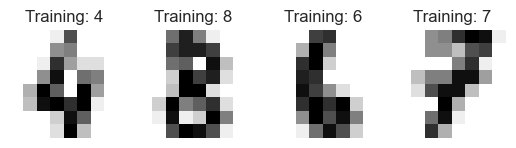

In [22]:
import matplotlib.pyplot as plt
from random import randint
_, axes = plt.subplots(nrows=1, ncols=4)

for ax in axes:
    num = randint(1, digit_dataset["target"].max())
    image = digit_dataset["images"][num]
    label = digit_dataset["target"][num]
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title('Training: %i' % label)

- matplotlib에서 회색을 회색으로 보려면 color map을 gray_r (gray reverse)로 해줘야하는 것을 기억해주세요.

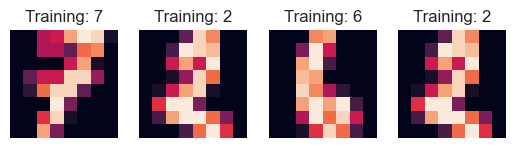

In [23]:
_, axes = plt.subplots(nrows=1, ncols=4)

for ax in axes:
    num = randint(1, digit_dataset["target"].max())
    image = digit_dataset["images"][num]
    label = digit_dataset["target"][num]
    ax.set_axis_off()
    ax.imshow(image)
    ax.set_title('Training: %i' % label)

- 학습 데이터를 준비하고, train/test set으로 나눕니다.
- 입력값으로는 차원 정보가 없는 images 값 대신 data 값을 사용합니다.

In [24]:
from sklearn.model_selection import train_test_split

X = digit_dataset["data"]
y = digit_dataset["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

- LogisticRegression을 학습시킵니다.
- Logistic Regression Softmax 방식

In [25]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [26]:
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(X_test).copy()
y_true = y_test.copy()
confusion_matrix(y_true, y_pred)

array([[44,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 40,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 49,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 61,  1,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0, 41,  0,  1,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 46,  1,  0],
       [ 0,  4,  0,  0,  0,  0,  0,  1, 40,  0],
       [ 0,  0,  0,  0,  1,  1,  0,  0,  2, 34]])

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.9577777777777777

- **정밀도(precision)** : 인공지능 모델이 1이라고 예측했을 때 얼마나 잘 맞을지에 대한 비율
- Multi-classification 의 precision 평가 함수의 average 방식을 지정해줘야합니다.
- Multi-classification 평가 함수의 인자 average에 따라 모든 데이터 셋에 대해서 평가하는가? 또는 각 라벨평 평가를 해서 평균을 짓는가를 결정할 수 있습니다.
- micro를 선택하면 전체 평균값, macro를 선택하면 각 라벨별 결과의 합에 대한 평균을 나타내며, weighted는 개수에 따른 가중 평균을 구하며, None은 class 별 결과를 보여줍니다.

In [28]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [31]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred, average="micro")

0.9577777777777777

In [32]:
precision_score(y_true, y_pred, average="macro")

0.9568517456953405

In [29]:
precision_score(y_true, y_pred, average=None)

array([1.        , 0.8372093 , 0.97560976, 0.97560976, 0.96078431,
       0.98387097, 0.97619048, 0.9787234 , 0.90909091, 0.97142857])

- **classification_report** 함수를 사용하면 클래스 별로 분류 성능을 표현할 수 있습니다.

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       0.84      1.00      0.91        36
           2       0.98      0.98      0.98        41
           3       0.98      0.95      0.96        42
           4       0.96      1.00      0.98        49
           5       0.98      0.98      0.98        62
           6       0.98      0.93      0.95        44
           7       0.98      0.94      0.96        49
           8       0.91      0.89      0.90        45
           9       0.97      0.89      0.93        38

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450
